Download lib:
http://www.dilloneng.com/uploads/2/1/2/2/21220816/demodel-0.2.tar.gz


In [1]:
from __future__ import division
import numpy as np
import math
from deModel import DeFixedInt
from deModel import arrayFixedInt
import scipy.signal as sig
from scipy.fftpack import fft, ifft, fftshift
import matplotlib.pyplot as plt

N=3
M=10

a_fp = 2.61231231241
b_fp = -1.54
a_fx = DeFixedInt(N,M, a_fp)
b_fx = DeFixedInt(N,M, b_fp)
print a_fx
print b_fx
print (b_fx.value / (2.0 ** b_fx.fractWidth))



<2675 (2.612) A(3,10)>
<-1577 (-1.540) A(3,10)>
-1.5400390625


/usr/local/lib/python2.7/dist-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


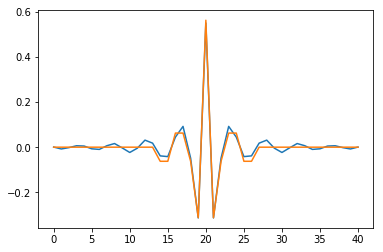

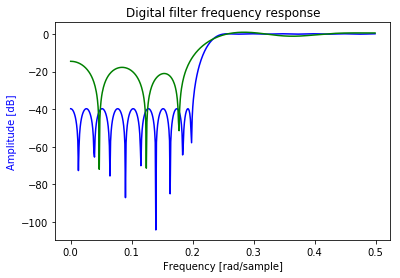

In [2]:
# Ejemplo filtro pasa altos
N=1
M=4
c = sig.remez(41, [0, 0.2, 0.25, 0.5], [0, 1],maxiter=100)
c_fxv = np.zeros(len(c))
c_fx2 = arrayFixedInt(N,M, c)
for i in range(len(c_fx2)):
   c_fxv[i] = (c_fx2[i].value / (2.0 ** c_fx2[i].fractWidth))

plt.plot (c)
plt.plot (c_fxv)

w, h = sig.freqz(c)
w_fx, h_fx = sig.freqz(c_fxv)
w = w/(2*np.pi)
fig = plt.figure()
plt.title('Digital filter frequency response')
ax1 = fig.add_subplot(111)
plt.plot(w, 20 * np.log10(abs(h)), 'b')
plt.ylabel('Amplitude [dB]', color='b')
plt.xlabel('Frequency [rad/sample]')
plt.plot(w, 20 * np.log10(abs(h_fx)), 'g')

plt.show()

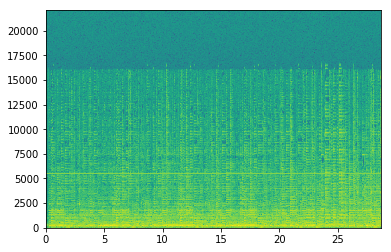

In [4]:
import scipy.io.wavfile
from scipy import signal
input_rate,audio=scipy.io.wavfile.read('audio_samples/classical_gas.wav')
Fs= input_rate
con_len=-1
audio_ch = audio[:con_len,0]
N= len(audio_ch)
t = np.arange(0, N/Fs, 1/Fs)
Fn = Fs/8
noise = 200*np.sin(2*np.pi*Fn*t) # Noise

Pxx, freqs, bins, im = plt.specgram((audio_ch+noise), NFFT=1024, Fs=Fs, noverlap=900)
plt.show()


In [ ]:
out=(audio_ch+noise)/np.max(np.abs(audio_ch+noise))
scipy.io.wavfile.write('out_with_noise.wav',Fs,out)

In [ ]:
h = np.array([1, -1.414, 1,1.273,-0.81])
h_fx = arrayFixedInt(2,2, h)
h_fxv = np.zeros(len(h))
for i in range(len(h_fx)):
   h_fxv[i] = (h_fx[i].value / (2.0 ** h_fx[i].fractWidth))
    
def notch_filter_ideal (signal):
    zeros = np.zeros(2)
    x = np.concatenate((zeros,signal), axis=0)
    y = np.zeros(len(signal)+2)
    for i in range (len(signal)):
        n = i+2 # Solo para facilitar la escritura
        #y[n] = h_fxv[0] * x[n] + h_fxv[1]* x[n-1] + h_fxv[2] * x[n-2] + h_fxv[3] * y[n-1] + h_fxv[4] * y[n-2]
        y[n] = h[0] * x[n] + h[1]* x[n-1] + h[2] * x[n-2] + h[3] * y[n-1] + h[4] * y[n-2]
    return y

def notch_filter_quant (signal):
    zeros = np.zeros(2)
    x = np.concatenate((zeros,signal), axis=0)
    y = np.zeros(len(signal)+2)
    for i in range (len(signal)):
        n = i+2 # Solo para facilitar la escritura
        y[n] = h_fxv[0] * x[n] + h_fxv[1]* x[n-1] + h_fxv[2] * x[n-2] + h_fxv[3] * y[n-1] + h_fxv[4] * y[n-2]        
    return y


zeros = np.zeros(100)
ones = np.ones(1)
dirac = np.concatenate((zeros,ones,zeros),axis=0)
plt.plot(abs(fft(notch_filter_ideal(dirac))))
plt.plot(abs(fft(notch_filter_quant(dirac))))

In [ ]:
out2= notch_filter_ideal(audio_ch+noise)
Pxx, freqs, bins, im = plt.specgram((out2), NFFT=1024, Fs=Fs, noverlap=900)
plt.show()

In [ ]:
out2=(out2)/np.max(np.abs(out2))
scipy.io.wavfile.write('out_filtered.wav',Fs,out2)